In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

fortuna us
mahebourg mu
jackson us
bredasdorp za
cardston ca
tiksi ru
bowen au
touros br
khatanga ru
kletnya ru
victoria sc
tumannyy ru
kapaa us
mecca sa
bom jesus br
shaoguan cn
yellowknife ca
qaanaaq gl
tasiilaq gl
kavieng pg
hasaki jp
kahului us
barrow us
tiksi ru
rikitea pf
thompson ca
saint-philippe re
rikitea pf
poum nc
carnarvon au
mar del plata ar
mahebourg mu
arraial do cabo br
avarua ck
hobart au
nieuw amsterdam sr
pisco pe
cintalapa mx
aksarka ru
upernavik gl
sao joao da barra br
kozhevnikovo ru
queanbeyan au
sorong id
castro cl
puerto ayora ec
gonzalez mx
kodiak us
provost ca
avarua ck
vestmannaeyjar is
talnakh ru
saltpond gh
olafsvik is
chuy uy
westport nz
chapais ca
vaini to
georgetown sh
albany au
port alfred za
mitu co
buala sb
taolanaro mg
rikitea pf
sijunjung id
la solana es
staryy nadym ru
praia cv
yellowknife ca
ushuaia ar
tura ru
hasaki jp
airai pw
santa rosa ar
albany au
rikitea pf
lebu cl
cape town za
groningen sr
ushuaia ar
ushuaia ar
punta arenas cl
taos us
car

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | jackson
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | cardston
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bowen
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | kletnya
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | mecca
Processing Record 15 of Set 1 | bom jesus
Processing Record 16 of Set 1 | shaoguan
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | kahului
Processing Record 23 of Set 1 | ba

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,62.92,84,75,9.22,US,2021-07-17 17:40:41
1,Mahebourg,-20.4081,57.7000,71.89,68,40,13.80,MU,2021-07-17 17:40:41
2,Jackson,42.4165,-122.8345,75.40,48,1,0.00,US,2021-07-17 17:36:43
3,Bredasdorp,-34.5322,20.0403,56.52,94,19,4.61,ZA,2021-07-17 17:40:42
4,Cardston,49.2000,-113.3019,81.46,27,48,1.14,CA,2021-07-17 17:40:42
5,Tiksi,71.6872,128.8694,37.40,78,99,11.99,RU,2021-07-17 17:40:42
6,Bowen,-20.0167,148.2333,52.02,34,88,7.20,AU,2021-07-17 17:40:43
7,Touros,-5.1989,-35.4608,79.70,67,11,16.22,BR,2021-07-17 17:40:43
8,Khatanga,71.9667,102.5000,54.14,68,79,10.13,RU,2021-07-17 17:40:43
9,Kletnya,53.3897,33.2171,78.96,82,57,1.30,RU,2021-07-17 17:40:43


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", 
                    "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2021-07-17 17:40:41,40.5982,-124.1573,62.92,84,75,9.22
1,Mahebourg,MU,2021-07-17 17:40:41,-20.4081,57.7000,71.89,68,40,13.80
2,Jackson,US,2021-07-17 17:36:43,42.4165,-122.8345,75.40,48,1,0.00
3,Bredasdorp,ZA,2021-07-17 17:40:42,-34.5322,20.0403,56.52,94,19,4.61
4,Cardston,CA,2021-07-17 17:40:42,49.2000,-113.3019,81.46,27,48,1.14
...,...,...,...,...,...,...,...,...,...
563,Xichang,CN,2021-07-17 17:43:21,27.8964,102.2634,64.42,93,74,1.99
564,Banepa,NP,2021-07-17 17:43:22,27.6298,85.5214,70.12,100,75,2.30
565,Sainte-Ode,BE,2021-07-17 17:43:22,50.0262,5.5254,74.95,79,25,11.01
566,Sambava,MG,2021-07-17 17:43:22,-14.2667,50.1667,70.90,82,19,12.12


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1626544390.820162

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

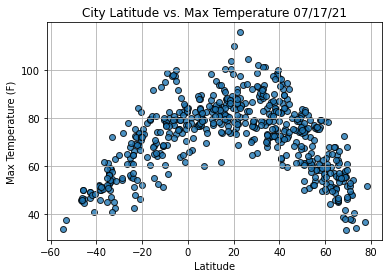

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

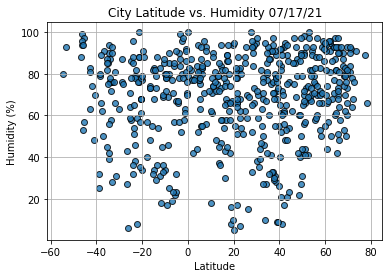

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

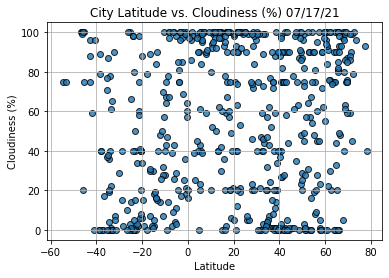

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

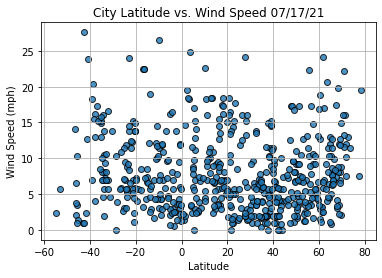

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()